In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings(action='ignore')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [4]:
plt.rc('font',family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [5]:
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

In [7]:
!move C:\Users\user\Downloads\dacon\KT-data\delivery.csv .

        1개 파일을 이동했습니다.


In [8]:
delivery = pd.read_csv('delivery.csv')

In [9]:
delivery.head()

,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,...,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,4577985,2020-01-01,C000035,1,C000035,S0032342,치킨,4812710600,경상남도,창원시 마산회원구,...,D0005271,4290,300,25000,1,승인:비씨카드사,2020-01-01 00:15:49,2020-01-01 00:21:38,2020-01-01 00:41:37,NaN
1,4577986,2020-01-01,C000237,1,C000237,S0021847,찜탕,4121010200,경기도,광명시,...,D0003269,4800,200,49000,2,NaN,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,NaN
2,4577988,2020-01-01,C000129,1,C000129,S0025740,치킨,1138010400,서울특별시,은평구,...,D0001536,3300,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NaN
3,4577989,2020-01-01,C000029,1,C000043,S0039634,한식,4115010100,경기도,의정부시,...,D0005061,4500,300,20000,2,NaN,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,NaN
4,4577991,2020-01-01,C000130,1,C000130,S0002237,한식,4128112800,경기도,고양시 덕양구,...,D0005215,6500,300,32000,2,NaN,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,NaN


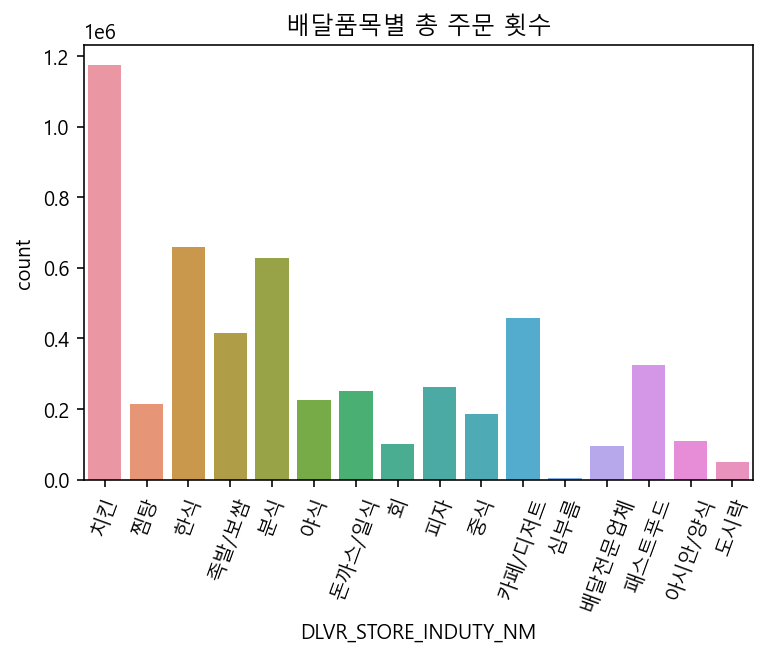

In [10]:
sns.countplot(x = 'DLVR_STORE_INDUTY_NM', data = delivery)
plt.title('배달품목별 총 주문 횟수')
plt.xticks(rotation=70)
plt.show()

In [11]:
from datetime import datetime

month = lambda x: datetime.strptime(x, "%Y-%m-%d").month

delivery["month"] = delivery["PROCESS_DT"].map(month)

In [12]:
dg = delivery.groupby(["month", "DLVR_STORE_INDUTY_NM"]).size().reset_index(name='count')

dg = dg[dg['month'] != 6]

In [15]:
sns.relplot(data=delivery, x='month', y='count', hue='DLVR_STORE_INDUTY_NM', col='DLVR_STORE_INDUTY_NM', col_wrap=4, kind='line')

ValueError: Could not interpret input 'count'